In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import time

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from pysad.models import IForestASD
from pysad.transform.probability_calibration import ConformalProbabilityCalibrator

random_state = np.random.RandomState(42)
import seaborn as sns
sns.set(style='ticks', font_scale=1.2, palette = "muted", rc={"font.size":10,"axes.titlesize":20,"axes.labelsize":18, "lines.linewidth": 2})

In [2]:
df = pd.read_csv('Metodos/PySAD/Resultados/IForestASD_completo.csv')
df.head()

,fecha,Negro,CurvaCola,Congelado,Hum,Anomalia,scores,Y_pred
0,2021-08-01 11:06:00,0,0,0,0,0,0.087673,1
1,2021-03-15 11:15:00,0,0,0,0,0,0.396174,0
2,2021-10-19 07:04:00,0,0,0,0,0,0.098290,1
3,2021-04-17 10:46:00,0,0,0,0,0,0.556836,0
4,2021-03-07 19:50:00,0,0,0,0,0,0.700244,0


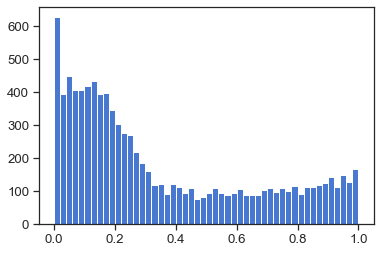

In [3]:
n, bins, patches = plt.hist(df[df['Anomalia']==1]['scores'], bins=50)
plt.show()

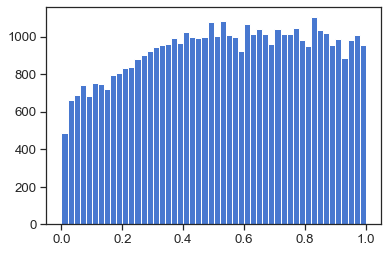

In [4]:
plt.hist(df[df['Anomalia']==0]['scores'], bins=50)
plt.show()

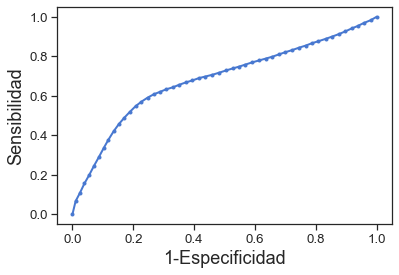

In [5]:
valores = np.array([])
sensibilidades = np.array([])
especificidades = np.array([])
fps = np.array([])
fns = np.array([])

for i in bins:
    df['Y_pred'] = df['scores'].map(lambda x: 1 if x < i else 0)
    valores = np.append(valores,i)
    sensibilidades = np.append(sensibilidades,recall_score(df['Anomalia'],df['Y_pred']))
    especificidades = np.append(especificidades,recall_score(df['Anomalia'],df['Y_pred'], pos_label=0))
    tn, fp, fn, tp = confusion_matrix(df['Anomalia'], df['Y_pred']).ravel()
    fps = np.append(fps,fp)
    fns = np.append(fns,fn)
    
plt.plot(1 - especificidades, sensibilidades,'.-')
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [6]:
resultados = pd.DataFrame([bins,sensibilidades, especificidades, fps, fns]).T
resultados.columns = ['bins','sensibilidades', 'especificidades', 'fps', 'fns']
resultados['coste'] = 0.3*resultados['fps'] + 0.7*resultados['fns']
resultados[resultados['coste']==resultados['coste'].min()]

,bins,sensibilidades,especificidades,fps,fns,coste
10,0.199997,0.456591,0.847547,7079.0,5095.0,5690.2


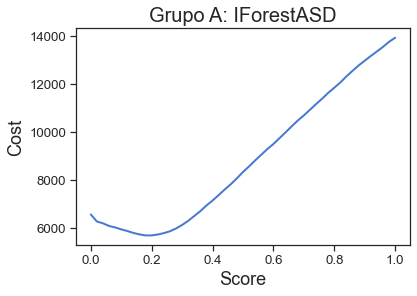

In [7]:
plt.plot(resultados['bins'], resultados['coste'])
plt.xlabel('Score')
plt.ylabel('Cost')
plt.title('Grupo A: IForestASD')
plt.savefig('Coste.png')